# Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

### Reading data

In [2]:
na_vals=["N/a","na",np.nan,"?","NA"]

In [3]:
train=pd.read_csv("train-1574429526318.csv",na_values=na_vals)
test=pd.read_csv("test-1574429501088.csv",na_values=na_vals)


In [4]:
df_train=train
df_test=test

In [5]:
train.head()

,CustomerID,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,5917,7824.372789,Basic,Bachelor,Unemployed,F,0.0,"17.7,77.7",Urban,Married,...,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214383,Four-Door Car,2.0
1,2057,8005.964669,Basic,College,Employed,M,63357.0,"28.8,76.6",Suburban,Married,...,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.508572,SUV,2.0
2,4119,8646.504109,Basic,High School or Below,Employed,F,64125.0,"21.6,88.4",Urban,Married,...,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.818708,SUV,1.0
3,1801,9294.088719,Basic,College,Employed,M,67544.0,"19,72.5",Suburban,Married,...,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800000,SUV,3.0
4,9618,5595.971365,Basic,Bachelor,Retired,F,19651.0,"19.1,74.7",Suburban,Married,...,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600000,Two-Door Car,3.0


In [6]:
g1=train.groupby(['Coverage'])['Customer.Lifetime.Value'].sum().reset_index()

In [7]:
test.head().T

,0,1,2,3,4
CustomerID,17,19,29,34,37
Coverage,Basic,Extended,Premium,Basic,Extended
Education,Bachelor,College,Master,Bachelor,Bachelor
EmploymentStatus,Employed,Employed,Employed,Employed,Disabled
Gender,M,F,M,F,F
Income,43836.0,28812.0,77026.0,24599.0,13789.0
Location.Geo,"12.6,79.4","17.3,78.4","18.4,73.5","17.1,78.2","13,80.1"
Location.Code,Rural,Urban,Urban,Rural,Suburban
Marital.Status,Single,Married,Married,Married,Divorced
Monthly.Premium.Auto,73.0,93.0,110.0,64.0,79.0


In [8]:
train.columns

Index(['CustomerID', 'Customer.Lifetime.Value', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Geo', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [9]:
test.columns

Index(['CustomerID', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Income', 'Location.Geo', 'Location.Code', 'Marital.Status',
       'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [10]:
print("Shape of train data:",train.shape)
print("Shape of test data:",test.shape)

Shape of train data: (9806, 22)
Shape of test data: (1767, 21)


### Dropping duplicates

In [11]:
train.drop_duplicates(keep='first',inplace=True)

In [12]:
test.drop_duplicates(keep='first',inplace=True)

In [13]:
print("Shape of train data:",train.shape)
print("Shape of test data:",test.shape)

Shape of train data: (9806, 22)
Shape of test data: (1767, 21)


In [14]:
## means no duplicates

### Describing data

In [15]:
print("---------------For Train_data---------------------------")
train.describe()

---------------For Train_data---------------------------


,CustomerID,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size
count,9806.000000,9806.000000,9688.000000,9012.000000,9806.000000,9806.000000,8988.000000,9685.000000,9806.000000,9680.000000
mean,5778.381807,7998.047015,37511.054604,93.340657,15.143993,48.165001,0.379172,2.960351,438.266734,2.089773
std,3343.286093,6848.055899,30292.974468,34.417763,10.004327,27.963630,0.896427,2.389801,293.502301,0.538524
min,1.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2879.250000,4013.949039,0.000000,68.750000,6.000000,24.000000,0.000000,1.000000,280.352767,2.000000
50%,5783.000000,5780.182197,33767.500000,83.000000,14.000000,48.000000,0.000000,2.000000,384.007015,2.000000
75%,8678.750000,8960.280213,62018.000000,109.000000,23.000000,71.750000,0.000000,4.000000,553.540973,2.000000
max,11573.000000,83325.381190,99981.000000,297.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,3.000000


In [16]:
print("------------------For Test_data------------------")
test.describe()

------------------For Test_data------------------


,CustomerID,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount
count,1767.000000,1528.000000,1695.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000
mean,5834.826825,44606.390707,93.622419,15.022071,47.486701,0.413696,3.002264,423.389681
std,3328.701974,29046.821652,34.752238,10.202317,27.954860,0.955579,2.388154,289.518186
min,17.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,1.332349
25%,2977.000000,23491.750000,69.000000,6.000000,24.000000,0.000000,1.000000,238.197494
50%,5813.000000,42821.000000,84.000000,14.000000,47.000000,0.000000,2.000000,381.118731
75%,8702.500000,67968.500000,110.000000,23.000000,71.000000,0.000000,4.000000,542.400000
max,11572.000000,99960.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2759.794354


#Seperating y and x

In [17]:
train.columns

Index(['CustomerID', 'Customer.Lifetime.Value', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Geo', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [18]:
y=train[["Customer.Lifetime.Value"]]
y.head()

,Customer.Lifetime.Value
0,7824.372789
1,8005.964669
2,8646.504109
3,9294.088719
4,5595.971365


In [19]:
x=train.drop(["Customer.Lifetime.Value"],axis=1)


In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 9805
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     9806 non-null   int64  
 1   Coverage                       8881 non-null   object 
 2   Education                      9677 non-null   object 
 3   EmploymentStatus               9688 non-null   object 
 4   Gender                         9677 non-null   object 
 5   Income                         9688 non-null   float64
 6   Location.Geo                   9806 non-null   object 
 7   Location.Code                  9687 non-null   object 
 8   Marital.Status                 9677 non-null   object 
 9   Monthly.Premium.Auto           9012 non-null   float64
 10  Months.Since.Last.Claim        9806 non-null   int64  
 11  Months.Since.Policy.Inception  9806 non-null   int64  
 12  Number.of.Open.Complaints      8988 non-null   f

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 0 to 1766
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     1767 non-null   int64  
 1   Coverage                       1767 non-null   object 
 2   Education                      1767 non-null   object 
 3   EmploymentStatus               1767 non-null   object 
 4   Gender                         1767 non-null   object 
 5   Income                         1528 non-null   float64
 6   Location.Geo                   1767 non-null   object 
 7   Location.Code                  1767 non-null   object 
 8   Marital.Status                 1767 non-null   object 
 9   Monthly.Premium.Auto           1695 non-null   float64
 10  Months.Since.Last.Claim        1767 non-null   int64  
 11  Months.Since.Policy.Inception  1767 non-null   int64  
 12  Number.of.Open.Complaints      1767 non-null   i

### Visualizing the data

<AxesSubplot: xlabel='Vehicle.Class', ylabel='count'>

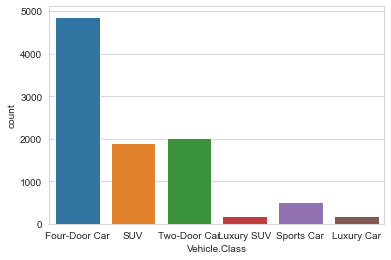

In [22]:
sns.set_style("whitegrid")
sns.countplot(x=train["Vehicle.Class"])

<AxesSubplot: xlabel='Gender', ylabel='count'>

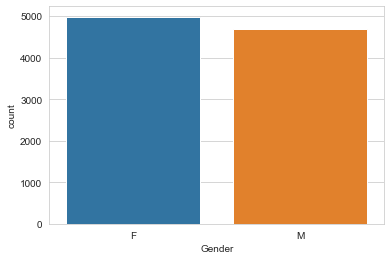

In [23]:
sns.countplot(x=train["Gender"])

import matplotlib.pyplot as plt

In [24]:
x.columns

Index(['CustomerID', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Income', 'Location.Geo', 'Location.Code', 'Marital.Status',
       'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

<AxesSubplot: xlabel='Income', ylabel='Customer.Lifetime.Value'>

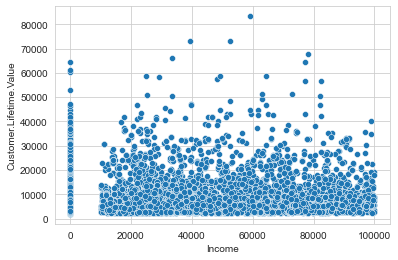

In [25]:
sns.scatterplot(x=x["Income"],y=y["Customer.Lifetime.Value"])


### Handling null values

In [26]:
##Visualizing null values

------On x_train data----------


<AxesSubplot: >

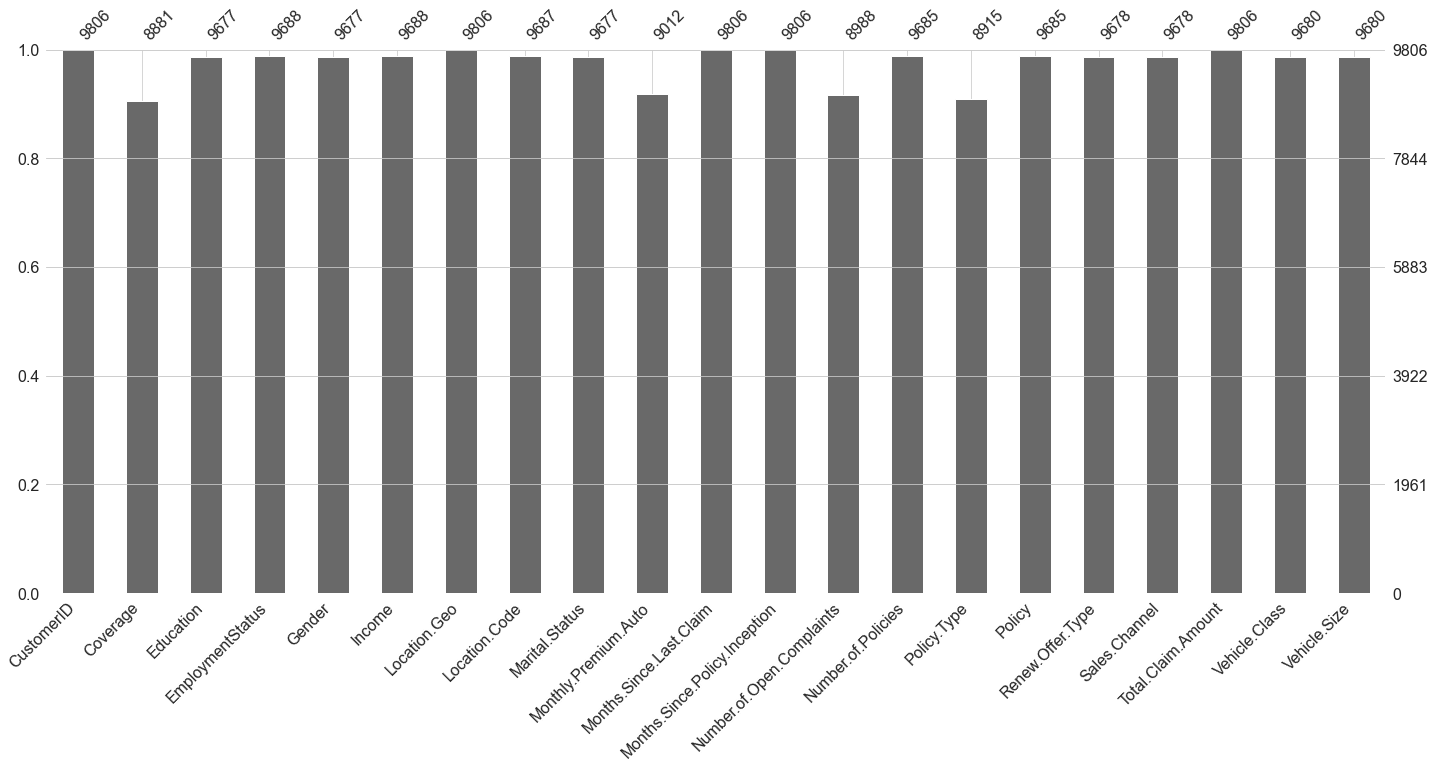

In [27]:
import missingno as msno
print("------On x_train data----------")
msno.bar(x)

-------------on ytrain----------------


<AxesSubplot: >

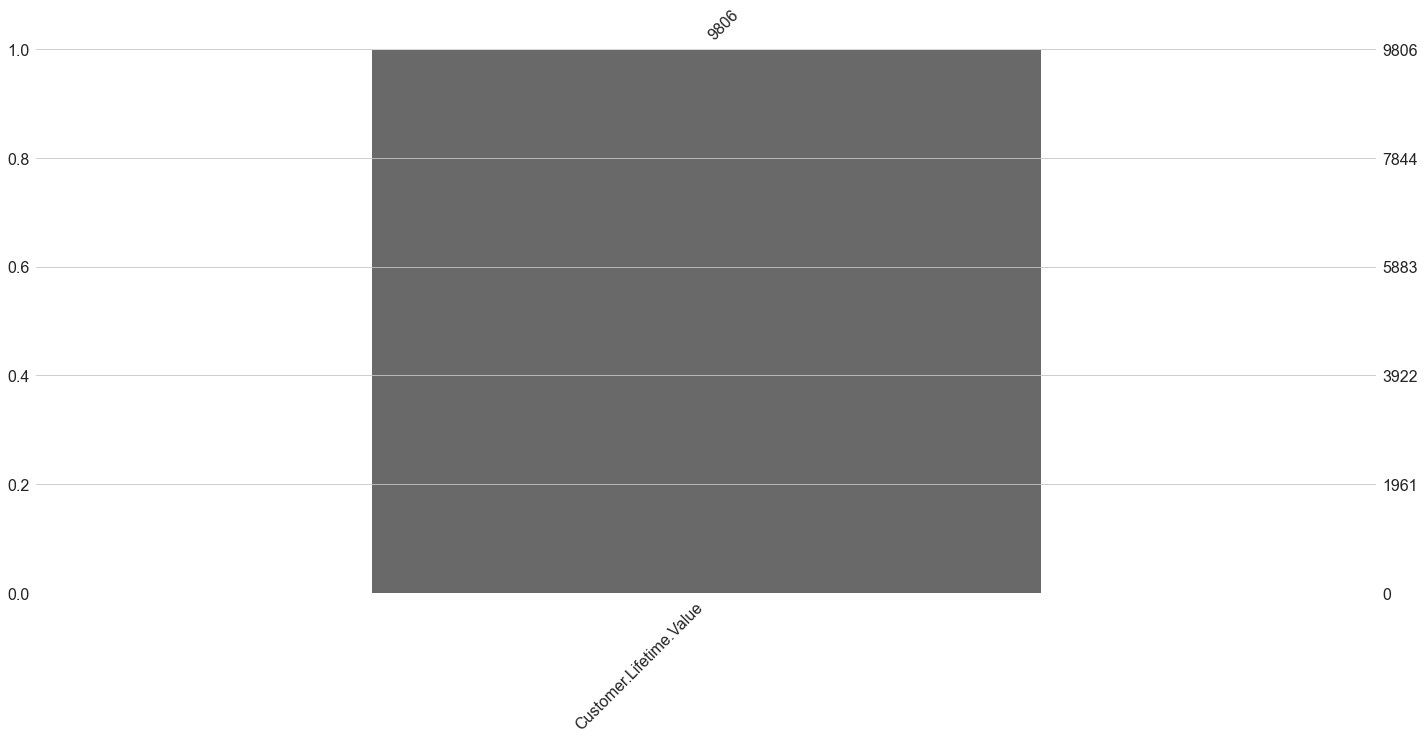

In [28]:
print("-------------on ytrain----------------")
msno.bar(y)

------------on test data---------------------


<AxesSubplot: >

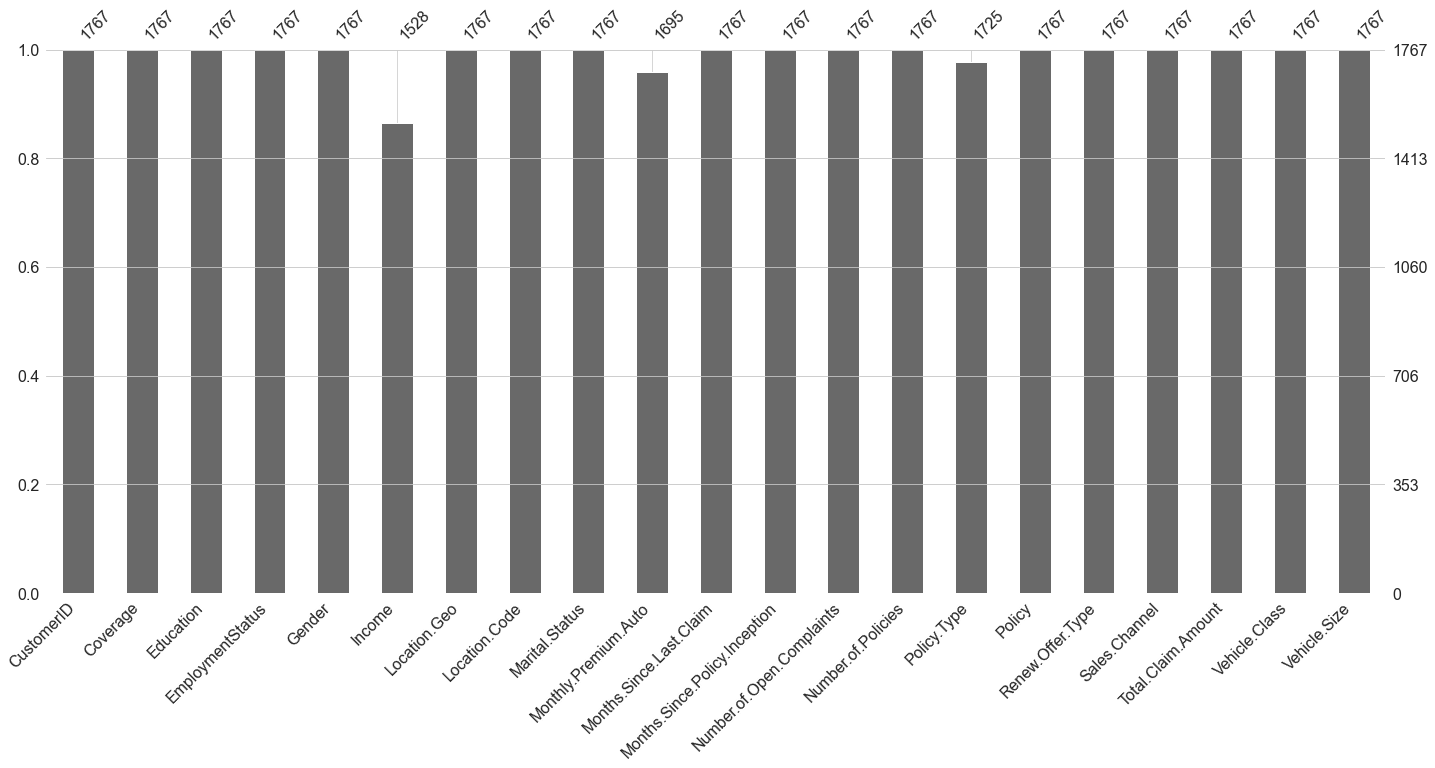

In [29]:
print("------------on test data---------------------")
msno.bar(test)

## Checking unique values

In [30]:
print("-------Unique Values in X------------")
print(x.nunique())


-------Unique Values in X------------
CustomerID                       9806
Coverage                            3
Education                           5
EmploymentStatus                    5
Gender                              2
Income                           4621
Location.Geo                     2840
Location.Code                       3
Marital.Status                      3
Monthly.Premium.Auto              191
Months.Since.Last.Claim            36
Months.Since.Policy.Inception     100
Number.of.Open.Complaints           6
Number.of.Policies                  9
Policy.Type                         3
Policy                              9
Renew.Offer.Type                    4
Sales.Channel                       4
Total.Claim.Amount               4125
Vehicle.Class                       6
Vehicle.Size                        3
dtype: int64


In [31]:
print("-------Unique Values in test------------")
print(test.nunique())


-------Unique Values in test------------
CustomerID                       1767
Coverage                            3
Education                           5
EmploymentStatus                    4
Gender                              2
Income                           1219
Location.Geo                     1192
Location.Code                       3
Marital.Status                      3
Monthly.Premium.Auto              142
Months.Since.Last.Claim            36
Months.Since.Policy.Inception     100
Number.of.Open.Complaints           6
Number.of.Policies                  9
Policy.Type                         3
Policy                              9
Renew.Offer.Type                    4
Sales.Channel                       4
Total.Claim.Amount               1192
Vehicle.Class                       6
Vehicle.Size                        3
dtype: int64


In [32]:
print("-------Unique Values in Y------------")
print(y.nunique())


-------Unique Values in Y------------
Customer.Lifetime.Value    6477
dtype: int64


In [33]:
## Removing unique valued columns like Id

In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 9805
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     9806 non-null   int64  
 1   Coverage                       8881 non-null   object 
 2   Education                      9677 non-null   object 
 3   EmploymentStatus               9688 non-null   object 
 4   Gender                         9677 non-null   object 
 5   Income                         9688 non-null   float64
 6   Location.Geo                   9806 non-null   object 
 7   Location.Code                  9687 non-null   object 
 8   Marital.Status                 9677 non-null   object 
 9   Monthly.Premium.Auto           9012 non-null   float64
 10  Months.Since.Last.Claim        9806 non-null   int64  
 11  Months.Since.Policy.Inception  9806 non-null   int64  
 12  Number.of.Open.Complaints      8988 non-null   f

In [35]:
x=x.drop(["CustomerID"],axis=1)

In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 9805
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Coverage                       8881 non-null   object 
 1   Education                      9677 non-null   object 
 2   EmploymentStatus               9688 non-null   object 
 3   Gender                         9677 non-null   object 
 4   Income                         9688 non-null   float64
 5   Location.Geo                   9806 non-null   object 
 6   Location.Code                  9687 non-null   object 
 7   Marital.Status                 9677 non-null   object 
 8   Monthly.Premium.Auto           9012 non-null   float64
 9   Months.Since.Last.Claim        9806 non-null   int64  
 10  Months.Since.Policy.Inception  9806 non-null   int64  
 11  Number.of.Open.Complaints      8988 non-null   float64
 12  Number.of.Policies             9685 non-null   f

In [37]:
test=test.drop(["CustomerID"],axis=1)

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 0 to 1766
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Coverage                       1767 non-null   object 
 1   Education                      1767 non-null   object 
 2   EmploymentStatus               1767 non-null   object 
 3   Gender                         1767 non-null   object 
 4   Income                         1528 non-null   float64
 5   Location.Geo                   1767 non-null   object 
 6   Location.Code                  1767 non-null   object 
 7   Marital.Status                 1767 non-null   object 
 8   Monthly.Premium.Auto           1695 non-null   float64
 9   Months.Since.Last.Claim        1767 non-null   int64  
 10  Months.Since.Policy.Inception  1767 non-null   int64  
 11  Number.of.Open.Complaints      1767 non-null   int64  
 12  Number.of.Policies             1767 non-null   i

### Seperating num and cat col names

In [39]:
x.shape

(9806, 20)

In [40]:
y.shape

(9806, 1)

In [41]:
test.shape

(1767, 20)

In [42]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 9805
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Coverage                       8881 non-null   object 
 1   Education                      9677 non-null   object 
 2   EmploymentStatus               9688 non-null   object 
 3   Gender                         9677 non-null   object 
 4   Income                         9688 non-null   float64
 5   Location.Geo                   9806 non-null   object 
 6   Location.Code                  9687 non-null   object 
 7   Marital.Status                 9677 non-null   object 
 8   Monthly.Premium.Auto           9012 non-null   float64
 9   Months.Since.Last.Claim        9806 non-null   int64  
 10  Months.Since.Policy.Inception  9806 non-null   int64  
 11  Number.of.Open.Complaints      8988 non-null   float64
 12  Number.of.Policies             9685 non-null   f

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 0 to 1766
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Coverage                       1767 non-null   object 
 1   Education                      1767 non-null   object 
 2   EmploymentStatus               1767 non-null   object 
 3   Gender                         1767 non-null   object 
 4   Income                         1528 non-null   float64
 5   Location.Geo                   1767 non-null   object 
 6   Location.Code                  1767 non-null   object 
 7   Marital.Status                 1767 non-null   object 
 8   Monthly.Premium.Auto           1695 non-null   float64
 9   Months.Since.Last.Claim        1767 non-null   int64  
 10  Months.Since.Policy.Inception  1767 non-null   int64  
 11  Number.of.Open.Complaints      1767 non-null   int64  
 12  Number.of.Policies             1767 non-null   i

In [44]:
## Here,I observe 
###In train data -----Vehicle.Size column is in float
             #but
###In test data ------- Vehicle.Size column is in object


In [45]:
test[["Vehicle.Size"]].value_counts()

Vehicle.Size
Medsize         1252
Small            343
Large            172
dtype: int64

In [46]:
x[["Vehicle.Size"]].value_counts()

Vehicle.Size
2.0             6795
3.0             1877
1.0             1008
dtype: int64

In [47]:
test["Vehicle.Size"].replace({'Medsize':2.0,'Large':3.0,'Small':1.0},inplace=True)

In [48]:
test["Vehicle.Size"].value_counts()

2.0    1252
1.0     343
3.0     172
Name: Vehicle.Size, dtype: int64

In [49]:
num_cols_train=[cols for cols in x.columns if x.dtypes[cols]!="object"]
num_cols_train

['Income',
 'Monthly.Premium.Auto',
 'Months.Since.Last.Claim',
 'Months.Since.Policy.Inception',
 'Number.of.Open.Complaints',
 'Number.of.Policies',
 'Total.Claim.Amount',
 'Vehicle.Size']

In [50]:
cat_cols_train=[cols for cols in x.columns if x.dtypes[cols]=="object"]
cat_cols_train

['Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location.Geo',
 'Location.Code',
 'Marital.Status',
 'Policy.Type',
 'Policy',
 'Renew.Offer.Type',
 'Sales.Channel',
 'Vehicle.Class']

In [51]:
num_cols_test=[cols for cols in test.columns if test.dtypes[cols]!="object"]
num_cols_test

['Income',
 'Monthly.Premium.Auto',
 'Months.Since.Last.Claim',
 'Months.Since.Policy.Inception',
 'Number.of.Open.Complaints',
 'Number.of.Policies',
 'Total.Claim.Amount',
 'Vehicle.Size']

In [52]:
cat_cols_test=[cols for cols in test.columns if test.dtypes[cols]=="object"]
cat_cols_test

['Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location.Geo',
 'Location.Code',
 'Marital.Status',
 'Policy.Type',
 'Policy',
 'Renew.Offer.Type',
 'Sales.Channel',
 'Vehicle.Class']

In [53]:
cat_cols_test==cat_cols_train

True

In [54]:
num_cols_test==num_cols_train

True

In [55]:
len(num_cols_train)+len(cat_cols_train)

20

In [56]:
train_catdata=x[cat_cols_train]
train_catdata.info()
train_catdata.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 9805
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Coverage          8881 non-null   object
 1   Education         9677 non-null   object
 2   EmploymentStatus  9688 non-null   object
 3   Gender            9677 non-null   object
 4   Location.Geo      9806 non-null   object
 5   Location.Code     9687 non-null   object
 6   Marital.Status    9677 non-null   object
 7   Policy.Type       8915 non-null   object
 8   Policy            9685 non-null   object
 9   Renew.Offer.Type  9678 non-null   object
 10  Sales.Channel     9678 non-null   object
 11  Vehicle.Class     9680 non-null   object
dtypes: object(12)
memory usage: 995.9+ KB


Coverage            925
Education           129
EmploymentStatus    118
Gender              129
Location.Geo          0
Location.Code       119
Marital.Status      129
Policy.Type         891
Policy              121
Renew.Offer.Type    128
Sales.Channel       128
Vehicle.Class       126
dtype: int64

In [57]:
train_catdata.head()

,Coverage,Education,EmploymentStatus,Gender,Location.Geo,Location.Code,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class
0,Basic,Bachelor,Unemployed,F,"17.7,77.7",Urban,Married,Personal Auto,Personal L2,Offer2,Branch,Four-Door Car
1,Basic,College,Employed,M,"28.8,76.6",Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,SUV
2,Basic,High School or Below,Employed,F,"21.6,88.4",Urban,Married,Personal Auto,Personal L1,Offer2,Branch,SUV
3,Basic,College,Employed,M,"19,72.5",Suburban,Married,Corporate Auto,Corporate L3,Offer1,Branch,SUV
4,Basic,Bachelor,Retired,F,"19.1,74.7",Suburban,Married,Personal Auto,Personal L1,Offer2,Web,Two-Door Car


In [58]:
train_numdata=x[num_cols_train]
train_numdata.info()
train_numdata.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 9805
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Income                         9688 non-null   float64
 1   Monthly.Premium.Auto           9012 non-null   float64
 2   Months.Since.Last.Claim        9806 non-null   int64  
 3   Months.Since.Policy.Inception  9806 non-null   int64  
 4   Number.of.Open.Complaints      8988 non-null   float64
 5   Number.of.Policies             9685 non-null   float64
 6   Total.Claim.Amount             9806 non-null   float64
 7   Vehicle.Size                   9680 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 689.5 KB


Income                           118
Monthly.Premium.Auto             794
Months.Since.Last.Claim            0
Months.Since.Policy.Inception      0
Number.of.Open.Complaints        818
Number.of.Policies               121
Total.Claim.Amount                 0
Vehicle.Size                     126
dtype: int64

In [59]:
train_numdata.head()

,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size
0,0.0,67.0,2,33,NaN,2.0,267.214383,2.0
1,63357.0,101.0,26,42,0.0,5.0,565.508572,2.0
2,64125.0,108.0,3,44,0.0,3.0,369.818708,1.0
3,67544.0,116.0,2,15,NaN,3.0,556.800000,3.0
4,19651.0,72.0,3,68,0.0,5.0,345.600000,3.0


In [60]:
test_catdata=test[cat_cols_test]
test_catdata.info()
test_catdata.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 0 to 1766
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Coverage          1767 non-null   object
 1   Education         1767 non-null   object
 2   EmploymentStatus  1767 non-null   object
 3   Gender            1767 non-null   object
 4   Location.Geo      1767 non-null   object
 5   Location.Code     1767 non-null   object
 6   Marital.Status    1767 non-null   object
 7   Policy.Type       1725 non-null   object
 8   Policy            1767 non-null   object
 9   Renew.Offer.Type  1767 non-null   object
 10  Sales.Channel     1767 non-null   object
 11  Vehicle.Class     1767 non-null   object
dtypes: object(12)
memory usage: 179.5+ KB


Coverage             0
Education            0
EmploymentStatus     0
Gender               0
Location.Geo         0
Location.Code        0
Marital.Status       0
Policy.Type         42
Policy               0
Renew.Offer.Type     0
Sales.Channel        0
Vehicle.Class        0
dtype: int64

In [61]:
test_catdata.head()

,Coverage,Education,EmploymentStatus,Gender,Location.Geo,Location.Code,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class
0,Basic,Bachelor,Employed,M,"12.6,79.4",Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car
1,Extended,College,Employed,F,"17.3,78.4",Urban,Married,Special Auto,Special L2,Offer2,Branch,Four-Door Car
2,Premium,Master,Employed,M,"18.4,73.5",Urban,Married,Corporate Auto,Corporate L1,Offer2,Agent,Four-Door Car
3,Basic,Bachelor,Employed,F,"17.1,78.2",Rural,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car
4,Extended,Bachelor,Disabled,F,"13,80.1",Suburban,Divorced,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car


In [62]:
test_numdata=test[num_cols_test]
test_numdata.info()
test_numdata.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 0 to 1766
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Income                         1528 non-null   float64
 1   Monthly.Premium.Auto           1695 non-null   float64
 2   Months.Since.Last.Claim        1767 non-null   int64  
 3   Months.Since.Policy.Inception  1767 non-null   int64  
 4   Number.of.Open.Complaints      1767 non-null   int64  
 5   Number.of.Policies             1767 non-null   int64  
 6   Total.Claim.Amount             1767 non-null   float64
 7   Vehicle.Size                   1767 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 124.2 KB


Income                           239
Monthly.Premium.Auto              72
Months.Since.Last.Claim            0
Months.Since.Policy.Inception      0
Number.of.Open.Complaints          0
Number.of.Policies                 0
Total.Claim.Amount                 0
Vehicle.Size                       0
dtype: int64

In [63]:
test_numdata.head()

,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size
0,43836.0,73.0,12,44,0,1,138.130879,2.0
1,28812.0,93.0,17,7,0,8,425.527834,2.0
2,77026.0,110.0,9,82,2,3,472.029737,2.0
3,24599.0,64.0,12,50,1,2,42.920271,2.0
4,13789.0,79.0,8,49,0,1,379.200000,2.0


In [64]:
#xtrain_catdata
#xtrain_numdata
#xtest_catdata
#xtest_numdata

# Train validation splitting

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7844, 20)
(1962, 20)
(7844, 1)
(1962, 1)


## imputing missing values using simple imputer

In [66]:
##Imputing on cat data

In [67]:
from sklearn.impute import SimpleImputer

In [68]:
impute_catdata=SimpleImputer(strategy="most_frequent")
impute_catdata.fit(x_train[cat_cols_train])

SimpleImputer(strategy='most_frequent')

In [69]:
xtrain_catdata=pd.DataFrame(impute_catdata.transform(x_train[cat_cols_train]),columns=cat_cols_train)
xtrain_catdata.isnull().sum()

Coverage            0
Education           0
EmploymentStatus    0
Gender              0
Location.Geo        0
Location.Code       0
Marital.Status      0
Policy.Type         0
Policy              0
Renew.Offer.Type    0
Sales.Channel       0
Vehicle.Class       0
dtype: int64

In [70]:
xtest_catdata=pd.DataFrame(impute_catdata.transform(x_test[cat_cols_train]),columns=cat_cols_train)
xtest_catdata.isnull().sum()

Coverage            0
Education           0
EmploymentStatus    0
Gender              0
Location.Geo        0
Location.Code       0
Marital.Status      0
Policy.Type         0
Policy              0
Renew.Offer.Type    0
Sales.Channel       0
Vehicle.Class       0
dtype: int64

In [71]:
test_catdata=pd.DataFrame(impute_catdata.transform(test[cat_cols_train]),columns=cat_cols_test)
test_catdata.isnull().sum()

Coverage            0
Education           0
EmploymentStatus    0
Gender              0
Location.Geo        0
Location.Code       0
Marital.Status      0
Policy.Type         0
Policy              0
Renew.Offer.Type    0
Sales.Channel       0
Vehicle.Class       0
dtype: int64

In [72]:
##Imputing on Num data

In [73]:
impute_numdata=SimpleImputer(strategy='mean')
impute_numdata.fit(x_train[num_cols_train])

SimpleImputer()

In [74]:
xtrain_numdata=pd.DataFrame(impute_numdata.transform(x_train[num_cols_train]),columns=num_cols_train)
xtrain_numdata.isnull().sum()

Income                           0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Total.Claim.Amount               0
Vehicle.Size                     0
dtype: int64

In [75]:
xtest_numdata=pd.DataFrame(impute_numdata.transform(x_test[num_cols_train]),columns=num_cols_train)
xtest_numdata.isnull().sum()

Income                           0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Total.Claim.Amount               0
Vehicle.Size                     0
dtype: int64

In [76]:
test_numdata=pd.DataFrame(impute_numdata.transform(test[num_cols_test]),columns=num_cols_test)
test_numdata.isnull().sum()

Income                           0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Total.Claim.Amount               0
Vehicle.Size                     0
dtype: int64

### Feature Selection for Num Data

In [77]:
xtrain_numdata.head()

,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size
0,43478.0,82.0,18.0,34.0,0.0,7.0,582.690575,2.0
1,0.0,128.0,15.0,37.0,0.0,2.0,1345.317161,2.0
2,34986.0,91.0,7.0,75.0,0.0,1.0,73.839514,2.0
3,19240.0,99.0,25.0,69.0,0.0,1.0,475.200000,3.0
4,73758.0,74.0,27.0,3.0,0.0,3.0,99.509191,3.0


## seeing correlation using heatmap

<AxesSubplot: >

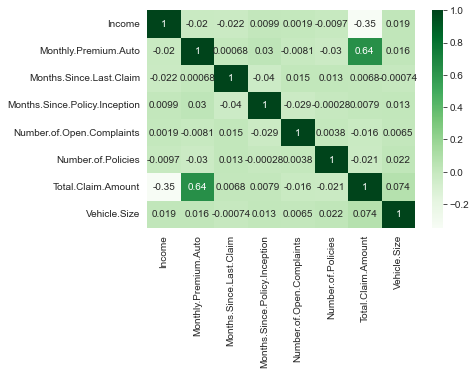

In [78]:
sns.heatmap(x_train[num_cols_train].corr(),annot=True,cmap='Greens')

In [79]:
## independent columns are not higghly correlated

## Feature selection Using Variance threshold

In [80]:
from sklearn.feature_selection import VarianceThreshold
var_th=VarianceThreshold(threshold=0)
var_th.fit(xtrain_numdata)

VarianceThreshold(threshold=0)

In [81]:
var_th.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [82]:
##No costant columns

## Scaling on Num data

In [83]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(xtrain_numdata)

StandardScaler()

In [84]:
xtrain_numdata_scale=pd.DataFrame(scale.transform(xtrain_numdata),columns=num_cols_train)
xtrain_numdata_scale.isnull().sum()

Income                           0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Total.Claim.Amount               0
Vehicle.Size                     0
dtype: int64

In [85]:
xtest_numdata_scale=pd.DataFrame(scale.transform(xtest_numdata),columns=num_cols_train)
xtest_numdata_scale.head()

,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size
0,-0.503595,-9.479714e-01,1.872936,1.332142,-0.444433,-0.829176,-0.477885,1.719903
1,-0.527591,4.265857e-16,-1.520483,0.398593,-0.444433,-0.410015,-0.615433,-0.155760
2,1.618464,7.330533e-01,1.174291,1.368048,-0.444433,-0.410015,-0.519409,-2.031424
3,-0.179838,-7.078251e-01,-0.322806,0.362687,-0.444433,-0.410015,-0.346989,1.719903
4,-0.211545,-4.742250e-02,0.475646,-1.037637,-0.444433,-0.410015,0.012977,1.719903


In [86]:
test_numdata_scale=pd.DataFrame(scale.transform(test_numdata),columns=num_cols_test)
test_numdata_scale.head()

,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size
0,0.211205,-0.617770,-0.322806,-0.139993,-0.444433,-0.829176,-1.021478,-0.15576
1,-0.286047,-0.017404,0.176226,-1.468505,-0.444433,2.104951,-0.041809,-0.15576
2,1.309700,0.492907,-0.622225,1.224425,1.883055,0.009146,0.116705,-0.15576
3,-0.425486,-0.887935,-0.322806,0.075441,0.719311,-0.410015,-1.346028,-0.15576
4,-0.783266,-0.437660,-0.722032,0.039536,-0.444433,-0.829176,-0.199730,-0.15576


### Dummification on categorical data using OneHot encoder

In [87]:
xtrain_catdata.info()
xtrain_catdata.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7844 entries, 0 to 7843
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Coverage          7844 non-null   object
 1   Education         7844 non-null   object
 2   EmploymentStatus  7844 non-null   object
 3   Gender            7844 non-null   object
 4   Location.Geo      7844 non-null   object
 5   Location.Code     7844 non-null   object
 6   Marital.Status    7844 non-null   object
 7   Policy.Type       7844 non-null   object
 8   Policy            7844 non-null   object
 9   Renew.Offer.Type  7844 non-null   object
 10  Sales.Channel     7844 non-null   object
 11  Vehicle.Class     7844 non-null   object
dtypes: object(12)
memory usage: 735.5+ KB


,Coverage,Education,EmploymentStatus,Gender,Location.Geo,Location.Code,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class
0,Extended,Bachelor,Employed,M,"18.5,72.8",Suburban,Married,Personal Auto,Personal L3,Offer2,Call Center,Four-Door Car
1,Extended,Bachelor,Unemployed,M,"18.3,73.3",Suburban,Single,Personal Auto,Personal L2,Offer1,Agent,SUV
2,Extended,Bachelor,Employed,F,"18.6,72.8",Rural,Married,Corporate Auto,Corporate L3,Offer4,Web,Four-Door Car
3,Extended,Bachelor,Disabled,F,"20.2,73.9",Suburban,Married,Personal Auto,Personal L2,Offer3,Call Center,Four-Door Car
4,Basic,High School or Below,Employed,M,"28.4,77.6",Rural,Divorced,Personal Auto,Personal L1,Offer1,Branch,Four-Door Car


In [88]:
xtest_catdata.info()
xtest_catdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Coverage          1962 non-null   object
 1   Education         1962 non-null   object
 2   EmploymentStatus  1962 non-null   object
 3   Gender            1962 non-null   object
 4   Location.Geo      1962 non-null   object
 5   Location.Code     1962 non-null   object
 6   Marital.Status    1962 non-null   object
 7   Policy.Type       1962 non-null   object
 8   Policy            1962 non-null   object
 9   Renew.Offer.Type  1962 non-null   object
 10  Sales.Channel     1962 non-null   object
 11  Vehicle.Class     1962 non-null   object
dtypes: object(12)
memory usage: 184.1+ KB


,Coverage,Education,EmploymentStatus,Gender,Location.Geo,Location.Code,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class
0,Basic,Master,Disabled,M,"29,76.6",Suburban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car
1,Basic,Master,Retired,F,"17.7,77.7",Urban,Married,Personal Auto,Personal L2,Offer1,Agent,Two-Door Car
2,Basic,Bachelor,Employed,F,"22.6,88.8",Rural,Married,Personal Auto,Personal L3,Offer1,Agent,Sports Car
3,Basic,Bachelor,Employed,F,"28.6,74.8",Suburban,Single,Personal Auto,Personal L2,Offer1,Call Center,Four-Door Car
4,Extended,High School or Below,Employed,M,"29.2,77.9",Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car


In [89]:
xtrain_catdata[cat_cols_train]=xtrain_catdata[cat_cols_train].astype("category")
xtrain_catdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7844 entries, 0 to 7843
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Coverage          7844 non-null   category
 1   Education         7844 non-null   category
 2   EmploymentStatus  7844 non-null   category
 3   Gender            7844 non-null   category
 4   Location.Geo      7844 non-null   category
 5   Location.Code     7844 non-null   category
 6   Marital.Status    7844 non-null   category
 7   Policy.Type       7844 non-null   category
 8   Policy            7844 non-null   category
 9   Renew.Offer.Type  7844 non-null   category
 10  Sales.Channel     7844 non-null   category
 11  Vehicle.Class     7844 non-null   category
dtypes: category(12)
memory usage: 186.6 KB


In [90]:
xtest_catdata[cat_cols_test]=xtest_catdata[cat_cols_test].astype("category")
xtest_catdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Coverage          1962 non-null   category
 1   Education         1962 non-null   category
 2   EmploymentStatus  1962 non-null   category
 3   Gender            1962 non-null   category
 4   Location.Geo      1962 non-null   category
 5   Location.Code     1962 non-null   category
 6   Marital.Status    1962 non-null   category
 7   Policy.Type       1962 non-null   category
 8   Policy            1962 non-null   category
 9   Renew.Offer.Type  1962 non-null   category
 10  Sales.Channel     1962 non-null   category
 11  Vehicle.Class     1962 non-null   category
dtypes: category(12)
memory usage: 69.1 KB


In [91]:
#using OneHotEncoder for categorical data 
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown="ignore")   # ignore used to remove the classes in test featrure which are not in train feature
#fitting on the train data
ohe.fit(xtrain_catdata)


OneHotEncoder(handle_unknown='ignore')

In [92]:
#list out the columns names
cols=list(ohe.get_feature_names(xtrain_catdata.columns))

In [93]:
#transform onto the train data
xtrain_cat=pd.DataFrame(ohe.transform(xtrain_catdata).todense(),columns=cols)
xtest_cat=pd.DataFrame(ohe.transform(xtest_catdata).todense(),columns=cols)
test_cat=pd.DataFrame(ohe.transform(test_catdata).todense(),columns=cols)

In [94]:
xtrain_cat.head()

,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,...,Sales.Channel_Agent,Sales.Channel_Branch,Sales.Channel_Call Center,Sales.Channel_Web,Vehicle.Class_Four-Door Car,Vehicle.Class_Luxury Car,Vehicle.Class_Luxury SUV,Vehicle.Class_SUV,Vehicle.Class_Sports Car,Vehicle.Class_Two-Door Car
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [95]:
xtrain_cat.info()
xtrain_cat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7844 entries, 0 to 7843
Columns: 2649 entries, Coverage_Basic to Vehicle.Class_Two-Door Car
dtypes: float64(2649)
memory usage: 158.5 MB


,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,...,Sales.Channel_Agent,Sales.Channel_Branch,Sales.Channel_Call Center,Sales.Channel_Web,Vehicle.Class_Four-Door Car,Vehicle.Class_Luxury Car,Vehicle.Class_Luxury SUV,Vehicle.Class_SUV,Vehicle.Class_Sports Car,Vehicle.Class_Two-Door Car
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [96]:
xtest_cat.info()
xtest_cat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Columns: 2649 entries, Coverage_Basic to Vehicle.Class_Two-Door Car
dtypes: float64(2649)
memory usage: 39.7 MB


,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,...,Sales.Channel_Agent,Sales.Channel_Branch,Sales.Channel_Call Center,Sales.Channel_Web,Vehicle.Class_Four-Door Car,Vehicle.Class_Luxury Car,Vehicle.Class_Luxury SUV,Vehicle.Class_SUV,Vehicle.Class_Sports Car,Vehicle.Class_Two-Door Car
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## concatinating both encoded categorical columns and standardized numerical columns

In [97]:
###concating both num and catdum data
train_data=pd.concat([xtrain_numdata,xtrain_cat],axis=1)
train_data


,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size,Coverage_Basic,Coverage_Extended,...,Sales.Channel_Agent,Sales.Channel_Branch,Sales.Channel_Call Center,Sales.Channel_Web,Vehicle.Class_Four-Door Car,Vehicle.Class_Luxury Car,Vehicle.Class_Luxury SUV,Vehicle.Class_SUV,Vehicle.Class_Sports Car,Vehicle.Class_Two-Door Car
0,43478.000000,82.0,18.0,34.0,0.0,7.000000,582.690575,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,128.0,15.0,37.0,0.0,2.000000,1345.317161,2.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,34986.000000,91.0,7.0,75.0,0.0,1.000000,73.839514,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,19240.000000,99.0,25.0,69.0,0.0,1.000000,475.200000,3.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,73758.000000,74.0,27.0,3.0,0.0,3.000000,99.509191,3.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7839,37454.645761,68.0,21.0,16.0,0.0,2.978179,504.000000,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7840,53375.000000,79.0,20.0,92.0,0.0,2.000000,127.322656,2.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7841,27444.000000,66.0,21.0,88.0,0.0,3.000000,313.931213,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7842,0.000000,88.0,2.0,43.0,0.0,3.000000,539.280951,2.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [98]:

valid_data=pd.concat([xtest_numdata,xtest_cat],axis=1)
valid_data.head()

,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size,Coverage_Basic,Coverage_Extended,...,Sales.Channel_Agent,Sales.Channel_Branch,Sales.Channel_Call Center,Sales.Channel_Web,Vehicle.Class_Four-Door Car,Vehicle.Class_Luxury Car,Vehicle.Class_Luxury SUV,Vehicle.Class_SUV,Vehicle.Class_Sports Car,Vehicle.Class_Two-Door Car
0,22239.0,62.000000,34.0,85.0,0.0,1.0,297.600000,3.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,21514.0,93.579786,0.0,59.0,0.0,2.0,257.248789,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,86355.0,118.000000,27.0,86.0,0.0,2.0,285.418473,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,32021.0,70.000000,12.0,58.0,0.0,2.0,336.000000,3.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,31063.0,92.000000,20.0,19.0,0.0,2.0,441.600000,3.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [99]:
test_data=pd.concat([test_numdata,test_cat],axis=1)
test_data.head()

,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size,Coverage_Basic,Coverage_Extended,...,Sales.Channel_Agent,Sales.Channel_Branch,Sales.Channel_Call Center,Sales.Channel_Web,Vehicle.Class_Four-Door Car,Vehicle.Class_Luxury Car,Vehicle.Class_Luxury SUV,Vehicle.Class_SUV,Vehicle.Class_Sports Car,Vehicle.Class_Two-Door Car
0,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,28812.0,93.0,17.0,7.0,0.0,8.0,425.527834,2.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,77026.0,110.0,9.0,82.0,2.0,3.0,472.029737,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,24599.0,64.0,12.0,50.0,1.0,2.0,42.920271,2.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,13789.0,79.0,8.0,49.0,0.0,1.0,379.200000,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Model building

### Model1: linear_regression_model

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
linear_reg=LinearRegression()
linear_reg.fit(train_data,y_train)

LinearRegression()

In [101]:
train_preds=linear_reg.predict(train_data)
valid_preds=linear_reg.predict(valid_data)

In [102]:
print("-------RMSE on Train Data-----------")
print(np.sqrt(mse(y_train,train_preds)))
print("-------RMSE on validation Data-----------")
print(np.sqrt(mse(y_test,valid_preds)))

-------RMSE on Train Data-----------
5116.043132723676
-------RMSE on validation Data-----------
7073.488627005815


## Creating submission file for model1

In [103]:

col=y_train.columns
model1_preds=pd.DataFrame(linear_reg.predict(test_data),columns=col)
model1_preds

,Customer.Lifetime.Value
0,6287.155409
1,7982.235682
2,12051.237119
3,4719.093086
4,5224.198313
...,...
1762,14355.160885
1763,8199.712839
1764,15115.282703
1765,6611.546889


In [104]:
subm=df_test[["CustomerID"]]
subm.head()

,CustomerID
0,17
1,19
2,29
3,34
4,37


In [105]:
submission_model1=pd.concat([subm,model1_preds],axis=1)
submission_model1

,CustomerID,Customer.Lifetime.Value
0,17,6287.155409
1,19,7982.235682
2,29,12051.237119
3,34,4719.093086
4,37,5224.198313
...,...,...
1762,11553,14355.160885
1763,11557,8199.712839
1764,11559,15115.282703
1765,11570,6611.546889


### Model2:Lasso_model

In [106]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
param_grid={
    'alpha':[0.001,0.1,1,10,100],
    'max_iter':[10,20,30,50,100,150,200],
    'random_state':[123,456]}

In [109]:
lasso_grid=GridSearchCV(estimator=lasso,param_grid=param_grid,cv=5,verbose=1)

In [110]:
lasso_grid.fit(train_data,y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.1, 1, 10, 100],
                         'max_iter': [10, 20, 30, 50, 100, 150, 200],
                         'random_state': [123, 456]},
             verbose=1)

In [111]:
train_preds=lasso_grid.predict(train_data)
valid_preds=lasso_grid.predict(valid_data)

In [112]:
print("-------RMSE on Train Data-----------")
print(np.sqrt(mse(y_train,train_preds)))
print("-------RMSE on validation Data-----------")
print(np.sqrt(mse(y_test,valid_preds)))

-------RMSE on Train Data-----------
6289.749472349069
-------RMSE on validation Data-----------
6095.675360701687


## Model3:RandomForest with gridsearch

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[100,150,200],
          'criterion':["squared_error"],
         'max_depth':[25,50,100],
           'min_samples_split':[2,4,5],
           'ccp_alpha':[1,2,3]}


In [ ]:
rfr_grid=GridSearchCV(estimator=rfr,param_grid=param_grid,cv=2,verbose=1)

In [ ]:
rfr_grid.fit(train_data,y_train)

In [ ]:
rfr_grid.best_params_

In [ ]:
train_preds=rfr_grid.predict(train_data)
valid_preds=rfr_grid.predict(valid_data)

In [ ]:
print("-------RMSE on Train Data-----------")
print(np.sqrt(mse(y_train,train_preds)))
print("-------RMSE on validation Data-----------")
print(np.sqrt(mse(y_test,valid_preds)))

In [ ]:
col=y_train.columns
model3_preds=pd.DataFrame(rfr_grid.predict(test_data),columns=col)
model3_preds

In [ ]:
subm=df_test[["CustomerID"]]
subm.head()

In [ ]:
submission_rfc=pd.concat([subm,model3_preds],axis=1)
submission_rfc

## Model4:AdaboostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adbr=AdaBoostRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[50,100,150,200,250],
          'learning_rate':[0.01,0.1,0.2,0.3,1,2,5],
         'loss':[ 'square']}


In [ ]:
adbr_grid=GridSearchCV(estimator=adbr,param_grid=param_grid,cv=5,verbose=1)

In [ ]:
adbr_grid.fit(train_data,y_train)

In [ ]:
adbr_grid.best_params_

In [ ]:
train_preds=adbr_grid.predict(train_data)
valid_preds=adbr_grid.predict(valid_data)

In [ ]:
print("-------RMSE on Train Data-----------")
print(np.sqrt(mse(y_train,train_preds)))
print("-------RMSE on Test Data-----------")
print(np.sqrt(mse(y_test,valid_preds)))

In [ ]:
col=y_train.columns
model4_ada5=pd.DataFrame(adbr_grid.predict(test_data),columns=col)
model4_ada5

In [ ]:
subm=df_test[["CustomerID"]]
subm.head()

In [ ]:
submission_ada=pd.concat([subm,model4_ada5],axis=1)
submission_ada

## Model5:KNNregressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnr=KNeighborsRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':[5,10,20],
          'weights':['uniform', 'distance'],
         'p':[1,2,3]}


In [ ]:
knnr_grid=GridSearchCV(estimator=knnr,param_grid=param_grid,cv=2,verbose=1)

In [ ]:
knnr_grid.fit(train_data,y_train)

In [ ]:
knnr_grid.best_params_

In [ ]:
train_preds=knnr_grid.predict(train_data)
valid_preds=knnr_grid.predict(valid_data)

In [ ]:
print("-------RMSE on Train Data-----------")
print(np.sqrt(mse(y_train,train_preds)))
print("-------RMSE on validation Data-----------")
print(np.sqrt(mse(y_test,valid_preds)))

In [ ]:
col=y_train.columns
model5_knnr=pd.DataFrame(knnr_grid.predict(test_data),columns=col)
model5_knnr

In [ ]:
subm=df_test[["CustomerID"]]
subm.head()

In [ ]:
submission_knnr=pd.concat([subm,model5_knnr],axis=1)
submission_knnr

## Model6:Xgboost regressor

In [ ]:
import xgboost
from xgboost import XGBRegressor
xgbr=XGBRegressor()


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[100,150,200,250,300,400],
           'learning_rate':[0.001,0.01,0.1],
           'gamma':[0.0001,0.001,0.01]}

In [ ]:

xgbr_grid=GridSearchCV(estimator=xgbr,param_grid=param_grid,cv=4,verbose=1)

In [ ]:
xgbr_grid.fit(train_data,y_train)

In [ ]:
xgbr_grid.best_params_

In [ ]:
train_preds=xgbr_grid.predict(train_data)
valid_preds=xgbr_grid.predict(valid_data)

In [ ]:
print("-------RMSE on Train Data-----------")
print(np.sqrt(mse(y_train,train_preds)))
print("-------RMSE on validation Data-----------")
print(np.sqrt(mse(y_test,valid_preds)))

In [ ]:
col=y_train.columns
model6_xgbr1=pd.DataFrame(xgbr_grid.predict(test_data),columns=col)
model6_xgbr1

In [ ]:
subm=df_test[["CustomerID"]]
subm.head()

In [ ]:
submission_xgbr1=pd.concat([subm,model6_xgbr],axis=1)
submission_xgbr1

## Clustering

In [ ]:
trainx_data.shape

In [ ]:
trainx_data.head()

In [ ]:
y_train.shape

In [ ]:
test_data.shape

In [ ]:
#import dtale

In [ ]:
#dtale.show(trainx_data)

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
import matplotlib.pyplot as plt
%matplotlib notebook

In [ ]:
linkage_matrix = linkage(trainx_data)



In [ ]:
#dendrogram
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)

dendrogram(linkage_matrix,labels=trainx_data.values)
plt.tight_layout()
plt.show()

In [ ]:
agg_clust =AgglomerativeClustering(n_clusters=6 ,affinity="euclidean" ,linkage = "ward")

In [ ]:

agg_clusters = agg_clust.fit_predict(trainx_data)

agg_clusters

In [ ]:
agg_clusters = agg_clust.fit_predict(trainx_data)
agg_clusters.shape